# Bài tập tự thực hành 2

In [50]:
# load data
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)

#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,

cancer_data.target,
test_size=0.3,random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Hard margin thư viện

In [3]:
hard_margin_svm = SVC(kernel='linear', C=float(10000))
hard_margin_svm.fit(X_train, y_train)

SVC(C=1000.0, kernel='linear')

In [4]:
y_hard_predict = hard_margin_svm.predict(X_test)

acc_hard_margin = accuracy_score(y_test, y_hard_predict)

print(f'accuracy using hard margin: {acc_hard_margin:.2f}')

accuracy using hard margin: 0.98


# Soft margin thư viện

In [5]:
soft_margin_svm = SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
y_soft_predict = soft_margin_svm.predict(X_test)

acc_soft_margin = accuracy_score(y_test, y_soft_predict)

print(f'accuracy using hard margin: {acc_soft_margin:.2f}')

accuracy using hard margin: 0.96


# Kernel thư viện

In [19]:
classifier = SVC(kernel ='rbf', random_state = 20, C=10)
classifier.fit(X_train, y_train)

SVC(C=10, random_state=20)

In [20]:
y_kernel_predict = classifier.predict(X_test)

acc_kernel = accuracy_score(y_test, y_kernel_predict)

print(f'accuracy using hard margin: {acc_kernel:.2f}')

accuracy using hard margin: 0.95


## Soft margin: tự xây dựng các bước giải bài toán ràng buộc

In [49]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cvxopt import matrix, solvers

C = 1
N_train = X_train.shape[0]
N_features = X_train.shape[1]

# Xây dựng ma trận K
K_train = np.dot(X_train, X_train.T)

p = matrix(-np.ones((N_train, 1)))
G = matrix(np.vstack((-np.eye(N_train), np.eye(N_train))))
h = matrix(np.vstack((np.zeros((N_train, 1)), C * np.ones((N_train, 1)))))
A = matrix(y_train.reshape((1, -1)), (1, N_train))

b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(matrix(K_train), p, G, h, A, b)

l = np.array(sol['x'])
support_vectors = np.where((l > 1e-5) & (l < C))[0]

# Tính trọng số w và độ lệch b
w_dual = np.sum(l[support_vectors] * y_train[support_vectors, np.newaxis] * X_train[support_vectors], axis=0)
b_dual = np.mean(y_train[support_vectors] - np.dot(X_train[support_vectors], w_dual))

# Bước 5: Đánh giá mô hình trên tập kiểm tra
predictions = np.sign(np.dot(X_test, w_dual) + b_dual)
accuracy = np.mean(predictions == y_test)
print("Accuracy on test set:", accuracy)

ValueError: shapes (0,30) and (0,30) not aligned: 30 (dim 1) != 0 (dim 0)

## Soft - margin. Xây dựng phương pháp giải bài toán tối ưu không ràng buộc:


In [51]:
X0 = X_train[y_train == 0]  # Lớp u lành tính (B)
X1 = X_train[y_train == 1]  # Lớp u ác tính (M)

# extended data
N = X_train.shape[0]
X0_bar = np.vstack((X0.T, np.ones((1, X0.shape[0]))))
X1_bar = np.vstack((X1.T, np.ones((1, X1.shape[0]))))

# as in (22)
Z = np.hstack((X0_bar, -X1_bar))

C = 100

# Thiết lập các thông số
lam = 1./C

# Hàm chi phí
def cost(w):
    u = w.T.dot(Z)
    return (np.sum(np.maximum(0, 1 - u)) + 0.5 * lam * np.sum(w*w)) - 0.5 * lam * w[-1] * w[-1]

# Đạo hàm của hàm chi phí
def grad(w):
    u = w.T.dot(Z)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis=1, keepdims=True) + lam * w)
    g[-1] -= lam * w[-1]
    return g

# Gradient descent
def grad_descent(w0, eta):
    w = w0
    it = 0
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta * g
        if (it % 10000) == 1:
            print('iter %d' % it + ' cost: %f' % cost(w))
        if np.linalg.norm(g) < 1e-5:
            break
    return w

# Huấn luyện mô hình
w0 = np.random.randn(X0_bar.shape[0], 1)
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
print(w_hinge.T, b_hinge)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21576\1448300213.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('iter %d' % it + ' cost: %f' % cost(w))


iter 1 cost: 46993932.738665
iter 10001 cost: 815293.882824
iter 20001 cost: 873947.379137
iter 30001 cost: 675748.309777
iter 40001 cost: 671672.330356
iter 50001 cost: 696225.533493
iter 60001 cost: 591336.723033
iter 70001 cost: 633234.509797
iter 80001 cost: 726313.461581
iter 90001 cost: 657054.395715
[[-8.46097920e+02 -1.66695138e+02 -2.32085214e+03 -5.20606922e+01
   1.42093738e+01  8.49765612e+01  1.26530026e+02  5.29487152e+01
   2.32019584e+01  3.70077411e+00 -2.59219851e+01 -6.90934163e+01
   1.46449905e+02  4.55597026e+02  2.17354329e+00  2.21003430e+01
   3.11878958e+01  7.51091510e+00  5.17323583e+00  2.77419492e+00
  -9.14369354e+02  1.44177188e+03 -4.43324911e+01  2.60167893e+02
   3.07365424e+01  2.91740301e+02  3.71704417e+02  1.05828791e+02
   7.73165106e+01  2.54043420e+01]] [-190.34510177]


Accuracy: 0.9415204678362573
Confusion Matrix:
[[ 53  10]
 [  0 108]]


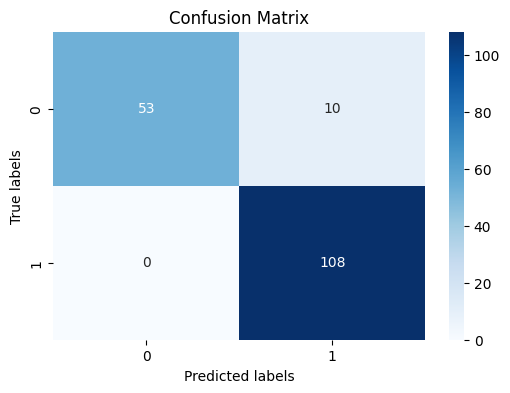

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán phân lớp cho tập dữ liệu kiểm tra
y_pred = np.sign(np.dot(X_test, w_hinge) + b_hinge).flatten()

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, np.where(y_pred > 0, 0, 1))

# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, np.where(y_pred > 0, 0, 1))

# Hiển thị kết quả
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Vẽ confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert labels to -1 and 1
y_1 = 2 * y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

m,n = X_train.shape
y_train = y_train.reshape(-1,1) * 1.
X_dash = y_train * X_train
H = np.dot(X_dash , X_dash.T) * 1.

P = matrix(H)
q = matrix(-np.ones((m, 1)))
G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = matrix(y_train.reshape(1, -1))
b = matrix(np.zeros(1))

# X0 = X_train[y_train == -1]  # Lớp u lành tính (B)
# X1 = X_train[y_train == 1]  # Lớp u ác tính (M)

C = 100

# Build A, b, G, h

# V = np.concatenate((X0.T, -X1.T), axis = 1)
# K = matrix(V.T.dot(V))
# p = matrix(-np.ones((X_train.shape[0], 1)))
# G = matrix(np.vstack((-np.eye(X_train.shape[0]), np.eye(X_train.shape[0]))))
# 
# h = matrix(np.vstack((np.zeros((X_train.shape[0], 1)), C*np.ones((X_train.shape[0], 1)))))
# # A = matrix(y_train.reshape((-1, X_train.shape[0])))
# A = matrix(np.diag(y_train.ravel()))

# b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[3.53242096e+001 1.13115264e-167 1.70188923e-167 1.21659640e-166
  2.51988154e-167 3.34808263e-167 3.56672747e+001 3.35796796e-167
  6.71523556e-167 3.29626121e-167 1.31047868e-166 1.55176999e-167
  3.79458925e-167 3.42325693e-167 4.82610772e-167 1.87661932e-167
  1.00385514e-167 1.97432363e-167 9.40704205e-167 3.87150865e-167
  7.72458343e-167 6.00328249e-167 1.27495113e-165 3.40517763e-167
  1.00000000e+002 3.97881684e-167 4.21742746e-167 1.07975792e-167
  2.36488890e-167 2.70463134e-167 5.15410259e-167 4.06636869e-167
  1.82018973e-167 1.64402630e-167 4.09207875e-166 3.80069182e-167
  7.97983506e-167 3.14492659e-167 1.98359973e-167 8.64651329e-167
  5.17868590e-167 7.41618644e-168 3.14975386e-167 2.28676142e-167
  7.44575643e-167 2.35685547e-167 9.71046043e-168 3.17329639e-167
  2.69681119e-167 4.08890823e-167 8.33683333e-167 3.26575031e-167
  3.99208513e-167 1.00000000e+002 2.47303219e-167 8.23295266e-167
  6.55083124e-167 5.29436046e-167 4.21783397e-167 1.68875502e-166

In [54]:
print(A.size)

(1, 455)


In [59]:
w = ((y_train * l).T @ X_train).reshape(-1,1)
S = (l > 1e-4).flatten()
b = y_train[S] - np.dot(X_train[S], w)

#Display results
print('l = ',l[l > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

l =  [ 35.32420964  35.66727467 100.         100.          42.06167375
 100.         100.         100.          51.78418701  19.65995777
 100.          35.87709906  53.72159948 100.          94.12235475
  42.89791046 100.         100.          43.80803757  66.65721264
  17.5376123   35.20788024 100.         100.         100.
  48.95204528 100.         100.         100.         100.
  87.20854328 100.          10.2416752  100.          75.47898417]
w =  [ 7.38985812e-02  1.07296326e-01 -2.68813626e-01  1.41035906e-02
 -4.35091235e+00  3.99577022e+00 -5.60390180e+00 -1.00783708e+01
  2.47260177e+00  5.86659880e-01  8.64024859e-01  2.32401136e+00
 -2.51112649e-01 -9.35374920e-02 -2.21996507e+00  7.85470365e+00
  9.09227058e+00 -6.92906953e-01  1.68684503e+00  1.45477279e+00
 -1.14626468e-01 -3.99228526e-01  7.83619736e-02 -4.77676222e-03
 -1.23806718e+01  6.63722735e+00 -6.63166227e+00 -8.66344471e+00
 -9.29845764e+00  1.20629272e+00]
b =  [27.04751246]


In [60]:
print(w.shape)

(30, 1)


In [61]:
print(b.shape)

(35, 1)


In [62]:
y_pred = np.sign(np.dot(X_test, w) + b_hinge).flatten()

In [67]:
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [66]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, np.where(y_pred > 0, 0, 1))
accuracy

0.6228070175438597

In [68]:
y_test

array([ 1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1])